# The Project :: Image Classification Using CNN

# Table Of Content ::
*****************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#Traning-data">Prepration-Training-data</a></li>
<li><a href="#Testing-data">Prepration-Tetsing-data</a></li>
<li><a href="#Preding-data">Prepration-preding-data</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid and Save_DL_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<p id="Intro">Introduction</p>

* Describtion of project ::
    *************************
    
    
 * That Is Deep-Learning Model Which classifer data into Classes :
 
      * Data-Classes : {'buildings': 0 ,'forest': 1 , 'glacier'     : 2 ,'mountain' : 3 , 'sea' : 4 , 'street' : 5}
      * We use CNN For Traning That Model
     
 
 
 
 * Data ::
     * We have Three Files :
         * Train-File that include Training data for Training CNN Model.
         * Test-File that include Testing data for Evaluate CNN Model.
         * Pred-File that include new data for predicting its class.

* Import Requried Liberaries and frameworks ::

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import warnings as w
import glob    as gb
import os 
import cv2
import keras
import matplotlib.pyplot as plt
import tensorflow as tf


* Set some instruction and rules ::

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline
# To ignore any Warning notification.
w.filterwarnings("ignore")
# To Set Figsize of Plots , Charts and Maps
sns.set(rc = {"figure.figsize" : [20 , 20]} , font_scale = 1.9)

<p id="Wrangling">Exploratory data analysis</p>

* Define The Path of all data

In [3]:
# data Paths ::
Train_Path ="G:/Data Field/Data Science\Repos/Singularity-Deep-Learning/04- CNN/seg_train/seg_train/"
Test_Path  ="G:/Data Field/Data Science\Repos/Singularity-Deep-Learning/04- CNN/seg_test/seg_test/"
Pred_Path  ="G:/Data Field/Data Science/Repos/Singularity-Deep-Learning/04- CNN/seg_pred/seg_pred/"

* Open Folders of all data and get  length of all one of that folders items 

In [4]:
# Train data ::
for folder in os.listdir(Train_Path) :
    Train_files = gb.glob(pathname = Train_Path + folder + "/*.jpg")
    print(f"The Count of Train images :: ( {len(Train_files)} ) jpg-img  in  ( {folder} )  folder")
    print("=" * 80 )
    print("=" * 80 )

The Count of Train images :: ( 2191 ) jpg-img  in  ( buildings )  folder
The Count of Train images :: ( 2271 ) jpg-img  in  ( forest )  folder
The Count of Train images :: ( 2404 ) jpg-img  in  ( glacier )  folder
The Count of Train images :: ( 2512 ) jpg-img  in  ( mountain )  folder
The Count of Train images :: ( 2274 ) jpg-img  in  ( sea )  folder
The Count of Train images :: ( 2382 ) jpg-img  in  ( street )  folder


In [5]:
# Test_data ::
for folder in os.listdir(Test_Path) :
    Test_filies = gb.glob(pathname = Test_Path + folder + "/*.jpg")
    print(f"The Count of Test images :: ( {len(Test_filies)} ) jpg-img  in  ( {folder} )  folder")
    print("=" * 80 )
    print("=" * 80 )

The Count of Test images :: ( 437 ) jpg-img  in  ( buildings )  folder
The Count of Test images :: ( 474 ) jpg-img  in  ( forest )  folder
The Count of Test images :: ( 553 ) jpg-img  in  ( glacier )  folder
The Count of Test images :: ( 525 ) jpg-img  in  ( mountain )  folder
The Count of Test images :: ( 510 ) jpg-img  in  ( sea )  folder
The Count of Test images :: ( 501 ) jpg-img  in  ( street )  folder


In [6]:
# Pred_data ::
Pred_files = gb.glob(pathname = Pred_Path + "/*.jpg")
print(f"The Count of Pred images :: ( {len(Pred_files)} ) jpg-img in ( pred ) folder")

The Count of Pred images :: ( 7301 ) jpg-img in ( pred ) folder


* Checking image ::
    * we have 6 categorical of data image.
    * we need to identify size of data.
* Reading Images ::
    * now it's time to read all images & convert it into arrays.
        * first we'll create a variable s , which refer to size , so we can change it easily.
        * let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [7]:
# create dict to map num of categories with labels
cat_code = {'buildings': 0 ,'forest': 1 , 'glacier' : 2 ,'mountain' : 3 , 'sea' : 4 , 'street' : 5}

In [8]:
# create func to return cate labels
def get_code (n) :
    for x , y in cat_code.items() :
        if n == y :
            return x

In [9]:

s = 100

<p id="Traning-data"> Prepration-Training-data</p>

In [10]:
# Train data behavior ::
Train_size = []
for folder in os.listdir(Train_Path) :
    Train_files = gb.glob(pathname = Train_Path + folder + "/*.jpg")
    for files in Train_files :
        img = plt.imread(files)
        Train_size.append(img.shape)
pd.Series(Train_size).value_counts()
        
    


(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(143, 150, 3)        2
(134, 150, 3)        2
(123, 150, 3)        2
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(97, 150, 3)         1
(115, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(141, 150, 3)        1
(149, 150, 3)        1
(81, 150, 3)         1
(103, 150, 3)        1
(131, 150, 3)        1
(76, 150, 3)         1
(100, 150, 3)        1
(120, 150, 3)        1
(145, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(147, 150, 3)        1
(105, 150, 3)        1
(133, 150, 3)        1
(110, 150, 3)        1
dtype: int64

In [11]:
# Split data into Train and Test and cnvert its size ::
x_train = []
y_train = []
for folder in os.listdir(Train_Path) :
    Train_files = gb.glob(pathname = Train_Path + folder + "/*.jpg")
    for files in Train_files :
        img     = cv2.imread(files)
        img_arr = cv2.resize(img , (s,s))
        x_train.append(list(img_arr))
        y_train.append(cat_code[folder])

In [12]:
# identify how many items in X_tarin
print(f'we have ( {len(x_train)} ) items in ( X_train )')

we have ( 14034 ) items in ( X_train )


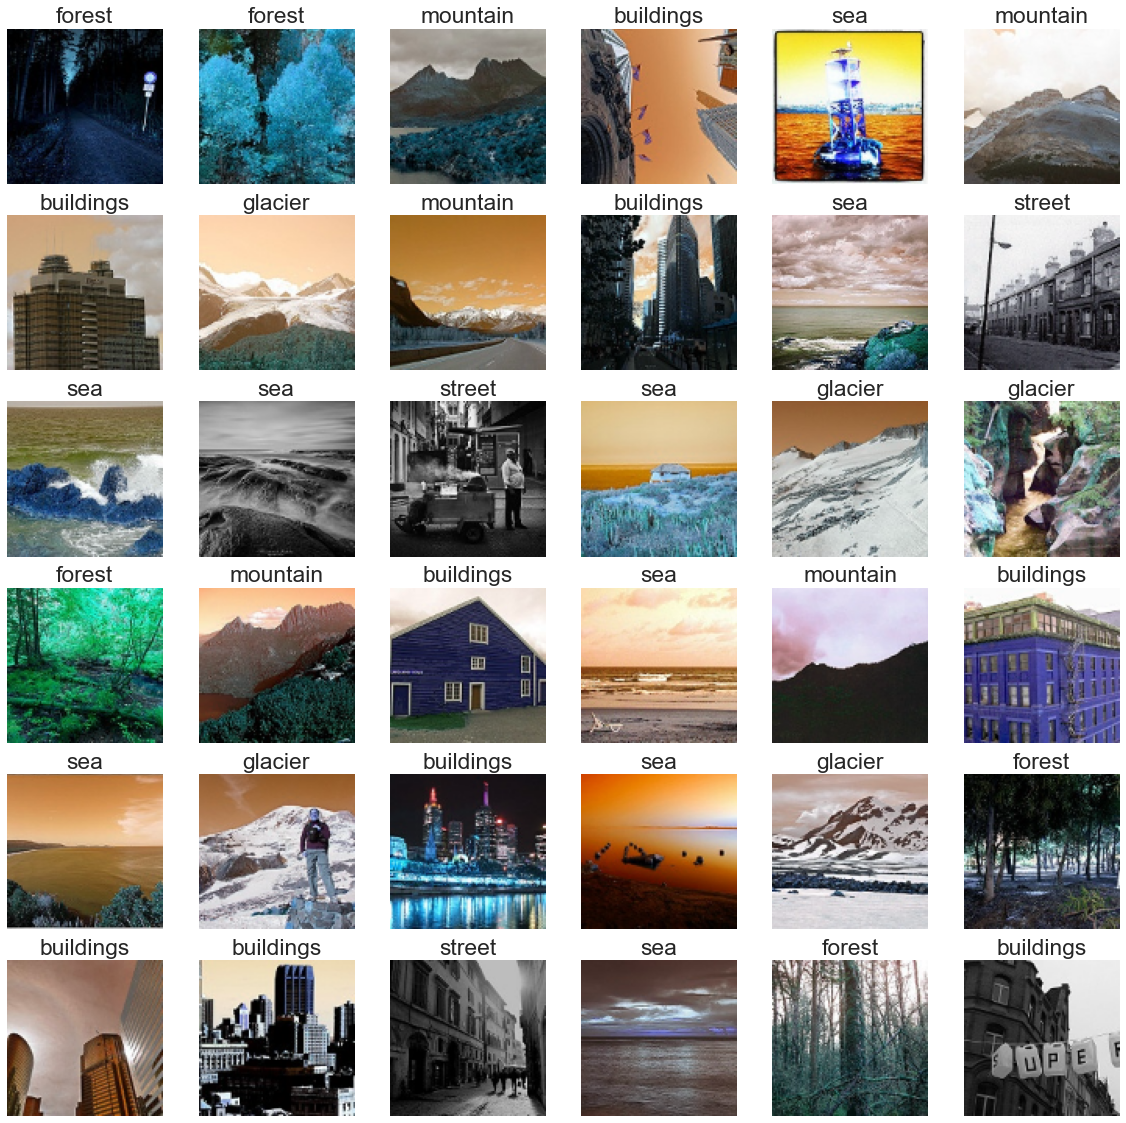

In [13]:
# present random image from Train data and present its label
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(get_code(y_train[i]))

<p id="Testing-data"> Prepration-Testing-data</p>

In [14]:
# Test data behavior ::
Test_size = []
for folder in os.listdir(Test_Path) :
    Test_files = gb.glob(pathname = Test_Path + folder + "/*.jpg")
    for files in Test_files :
        img = plt.imread(files)
        Test_size.append(img.shape)
pd.Series(Test_size).value_counts()

(150, 150, 3)    2993
(81, 150, 3)        1
(76, 150, 3)        1
(72, 150, 3)        1
(131, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

In [15]:
# Split data into Train and Test and cnvert its size ::
x_test = []
y_test = []
for folder in os.listdir(Test_Path) :
    Test_files = gb.glob(pathname = Test_Path + folder + "/*.jpg")
    for files in Test_files :
        img     = cv2.imread(files)
        img_arr = cv2.resize(img , (s,s))
        x_test.append(list(img_arr))
        y_test.append(cat_code[folder])

In [16]:
# identify how many items in X_tarin
print(f'we have ( {len(x_test)} ) items in ( x_Test )')

we have ( 3000 ) items in ( x_Test )


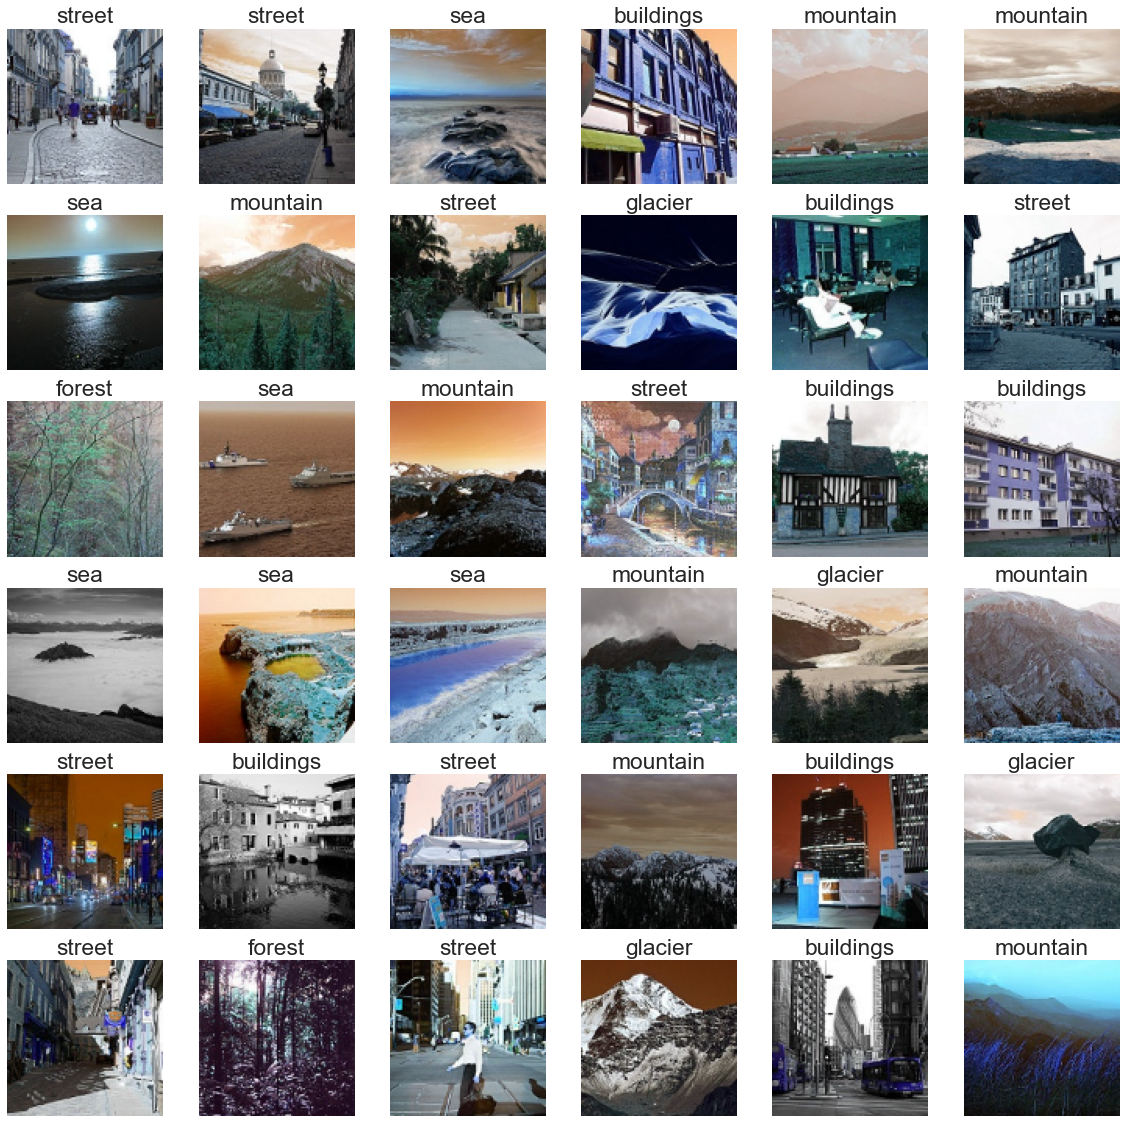

In [17]:
# present random image from Test data and present its label
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])   
    plt.axis('off')
    plt.title(get_code(y_test[i]))

<p id="Preding-data"> Prepration-Preding-data</p>

In [18]:
# Pred data ::
x_pred = []
Pred_files = gb.glob(pathname = Pred_Path + "/*.jpg")
for files in Pred_files :
        img     = cv2.imread(files)
        img_arr = cv2.resize(img , (s,s))
        x_pred.append(list(img_arr))


In [19]:
# identify how many items in x_pred
print(f'we have ( {len(x_pred)} ) items  in ( x_pred )')

we have ( 7301 ) items  in ( x_pred )


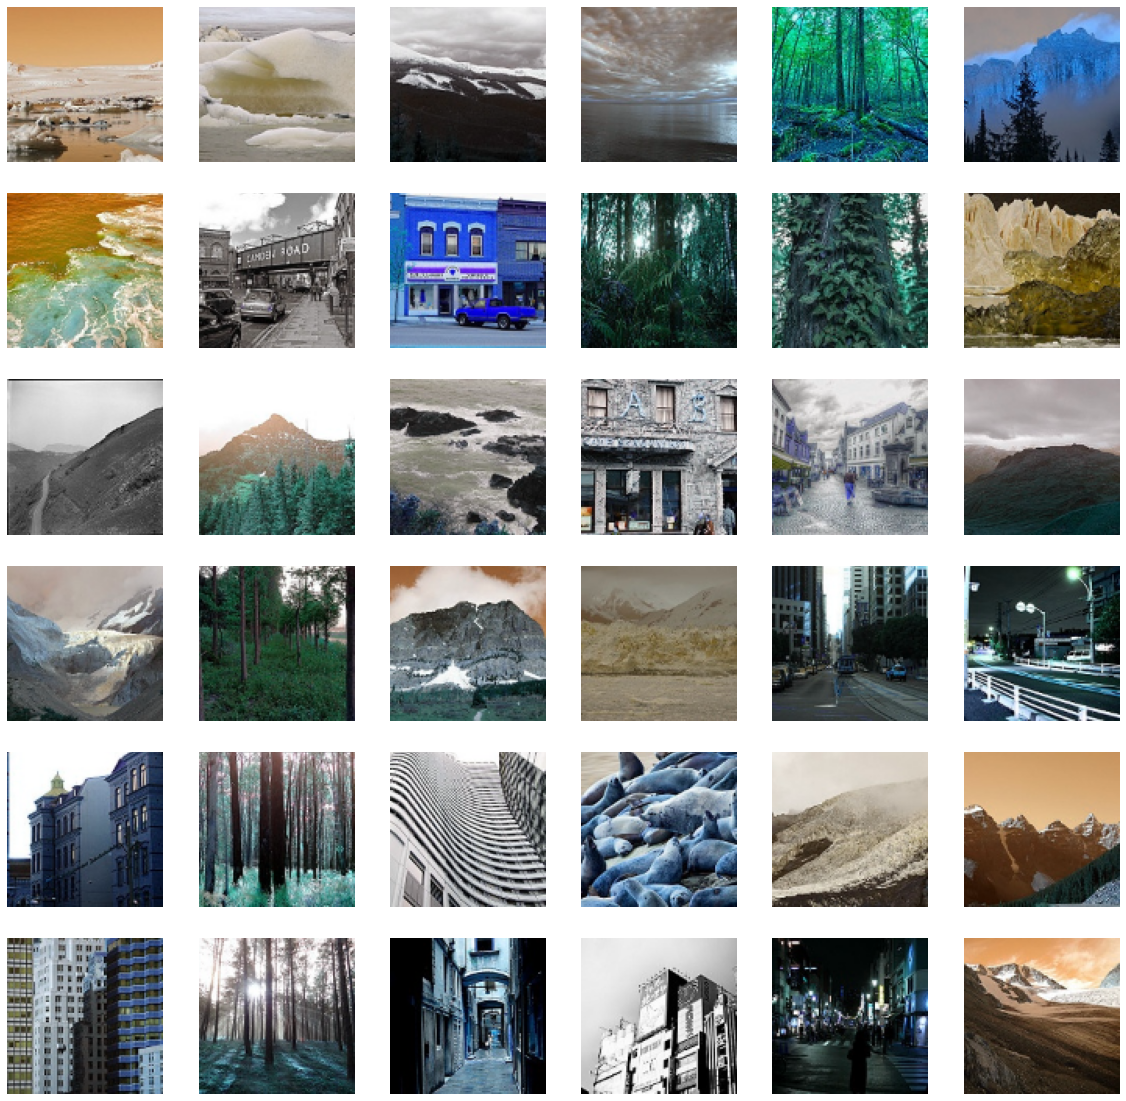

In [20]:
# present random image from pred data 
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])   
    plt.axis('off')


<p id="Prepration">Data_Prepration</p>

* At First we must convert img into np arrays 

In [21]:
# convert img unto nd arrays ::
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test  = np.array(x_test)
y_test  = np.array(y_test)
x_pred  = np.array(x_pred)

# investigate convertt done ::
print(f'X_train shape   ::  {x_train.shape}')
print(f'X_test shape    ::  {x_test.shape}')
print(f'X_pred shape    ::  {x_pred.shape}')
print(f'y_train shape   ::  {y_train.shape}')
print(f'y_test shape    ::  {y_test.shape}')

X_train shape   ::  (14034, 100, 100, 3)
X_test shape    ::  (3000, 100, 100, 3)
X_pred shape    ::  (7301, 100, 100, 3)
y_train shape   ::  (14034,)
y_test shape    ::  (3000,)


<p id = "Model">Bulid and Save_DL_Model</p>

In [22]:
# now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

CNN_Model = keras.models.Sequential([
    # 1nd layer
    keras.layers.Conv2D(200 , kernel_size = (3,3) , activation = "relu"  , input_shape = x_train.shape[1:]) ,
    keras.layers.Conv2D(150 , kernel_size = (3,3) , activation = "relu") ,
    keras.layers.MaxPool2D(4,4) , 
    
    # 2nd layer
    keras.layers.Conv2D(120 , kernel_size = (3,3) , activation = "relu" ) ,
    keras.layers.Conv2D(80 , kernel_size = (3,3) , activation = "relu" )  ,
    keras.layers.Conv2D(50 , kernel_size = (3,3) , activation = "relu" )  ,
    keras.layers.MaxPool2D(4,4) ,
    
    # Dense layer
    keras.layers.Flatten() , 
    keras.layers.Dense(120 , activation = "relu") ,
    keras.layers.Dense(100 , activation = "relu") ,
    keras.layers.Dense(50 , activation = "relu") ,
    keras.layers.Dropout(0.2) , 
    
    # Output layer
    keras.layers.Dense(6 , activation = "softmax") ,
                                    ]) 

In [23]:
# now to compile the model , using adam optimizer , & sparse categorical crossentropy loss ::
CNN_Model.compile(optimizer= "adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [24]:
# Present Model details ::
print(CNN_Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint('mcp_Model.h5')



In [ ]:
# Fit Model ::
CNN_Model.fit(x_train , y_train , epochs=30 , batch_size = 64 , verbose = 1 ,  callbacks = [mcp] )


Epoch 1/30
 35/220 [===>..........................] - ETA: 19:43 - loss: 4.3323 - accuracy: 0.1988

<p id = "Evaluation">Evaluate_Model</p>

In [ ]:
# Evaluate Model ::
ModelLoss, ModelAccuracy = CNN_Model.evaluate(x_test, y_test)
print(f"The Val_Loss :: {ModelLoss}\n******************\nThe Model acc :: {ModelAccuracy}")

In [ ]:
# Prediction ::
y_pred = CNN_Model.predict(x_test)
print(f"The y_pred size :: {y_pred.shape}")

<p id = "Save">Save_Model</p>

In [ ]:
CNN_Model.save("CNN_Model.h5")

<p id = "conclusions">conclusions</p>

In [ ]:
y_res = CNN_Model.predict(x_pred)
print(f"The y_pred size :: {y_res.shape}")

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')
    plt.title(get_code(np.argmax(y_res[i])))